In [1]:
!pip3 install category_encoders

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/Users/andrew/django-vue-admin/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip3 install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/Users/andrew/django-vue-admin/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce
from matplotlib import colors as c
from matplotlib import gridspec as grid

# 2. About the Dataset

The dataset is from 2020 annual CDC survey data of 400k adults related to their health status. 

Retrieved from Kaggle Dataset *Personal Key Indicators of Heart Disease* uploaded by **Kamil Pytlak** 

Explore more at: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


In [4]:
df = pd.read_csv('./heart_2020_cleaned.csv')
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Column Details
* HeartDisease: Responders that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). (Yes / No)

* BMI: Body Mass Index 

* Smoking: Responders that have smoked at least 100 ciagrettes in their lives (Yes / No)

* AlcoholDrinking: Adult men having more than 14 drinks per week and adult women having more than 7 drinks per week (Yes / No)

* Stroke: Repsonders that have had a stroke (Yes / No)

* PhysicalHealth: How many days during the last 30 days were the responders' physical health not good? (0-30 days)

* MentalHealth: How many days during the last 30 days was the responders' mental health not good? (0-30 days)

* DiffWalking: Responders have serious difficulty walking or climbing stairs? (Yes / No)

* Sex: Female or Male 

* AgeCategory: 13 age groups: '18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'

* Race: 7 race groups: 'White', 'Black', 'Asian', 'American Indian/Alaskan Native','Other', 'Hispanic'

* Diabetic: Responders' status of diabetes: 'Yes','No'','No, borderline diabetes', 'Yes (during pregnancy)'

* PhysicalActivity: Responders that reported doing physical activity or exercise during the last 30 days other than their regular job. (Yes / No)

* GenHealth: Responders' evaluation their own health by 5 categories: 'Poor','Fair','Good','Very good','Excellent'

* SleepTime: On average, how many hours of sleep do the responders get in a 24-hour period

* Asthma: Responders that have had asthma? (Yes / No)

* KidneyDisease: Responders that have had kiney disease except kidney stones, bladder infection, or incontinence (Yes / No)

* SkinCancer: Responders that have had skin cancer? (Yes / No)


# 3. Exploratory Data Analyis

## 3.1 Color Theme

For visualization, I often use color generator from Coolors, and for visualizing this dataset I have a gradient palette of 7 colors: #F0073B, #E7134B, #DE1E5A, #CB3579, #C24189, #B94C98.

For matplotlib graph we need to convert the colors into the RGBA format before using them; however it is not the case for Seaborn charts.

In [5]:
# Convert color palette into rgba format for later use
c1 = c.to_rgba('#F0073B')
c2 = c.to_rgba("#E7134B")
c3 = c.to_rgba("#DE1E5A")
c4 = c.to_rgba("#D52A6A")
c5 = c.to_rgba("#CB3579")
c6 = c.to_rgba("#C24189")
c7 = c.to_rgba('#B94C98')

## 3.2 Feature types

#### Categorical Features
* Binary categorical features: HeartDisease, Smoking, Stroke, Asthma, AlcoholDrinking, KidneyDisease , SkinCancer, PhysicalActivity, DiffWalking

* Ordinal categorical features: AgeCategory, GenHealth

* Nominal categorical features: Race, Diabetic

#### Numerical Features
* Continuous numerical features: BMI

* Discrete numerical features: PhysicalHealth,MentalHealth, SleepTime

## 3.3 Visualization

##### Numerical feature distribution


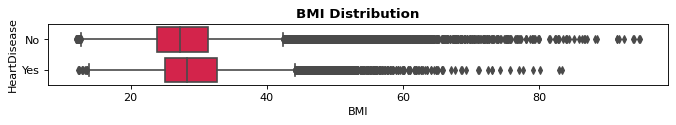

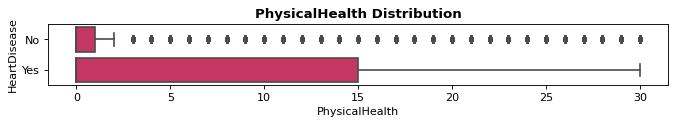

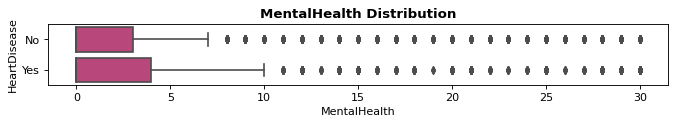

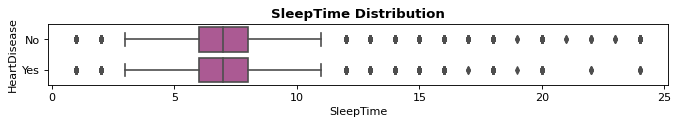

In [6]:
cont_col = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
boxplot_color = [c1,c3,c5,c7]


for i in range(0,len(cont_col)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x= df[cont_col[i]], y=df['HeartDisease'], data=df, orient="h", color=boxplot_color[i])
    plt.title(cont_col[i] + " Distribution", fontweight='bold')
    plt.show()

While the boxplots show there are no significant differences between adults with and without heart disease in BMI, sleep time and mental health as well as the distinct distribution in physical health between these evaluated groups, further correlation analysis will be conducted later to evaluate the relationship of heart disease and these features.

#### Categorical features distribution

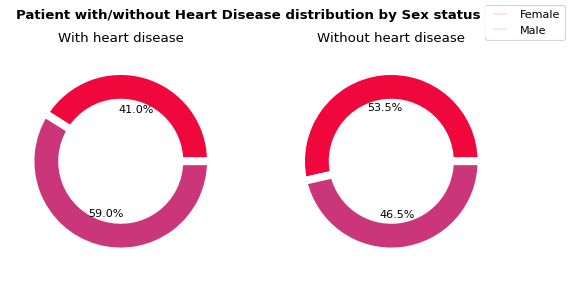

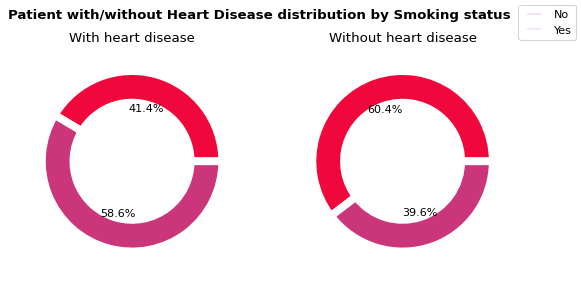

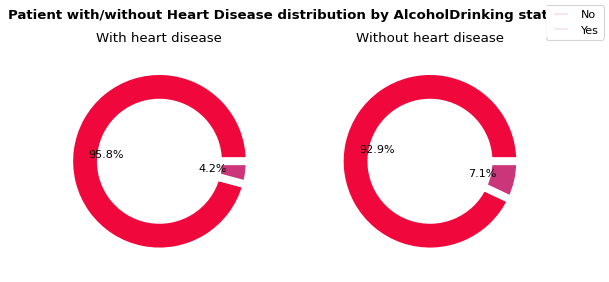

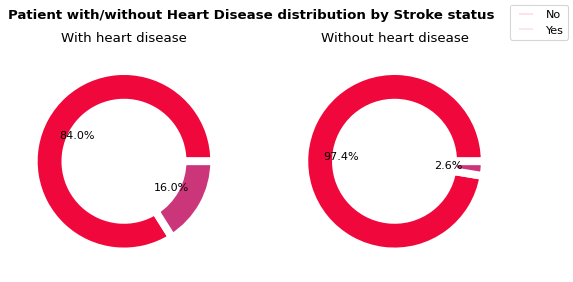

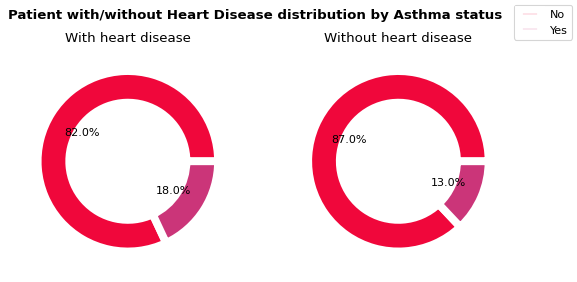

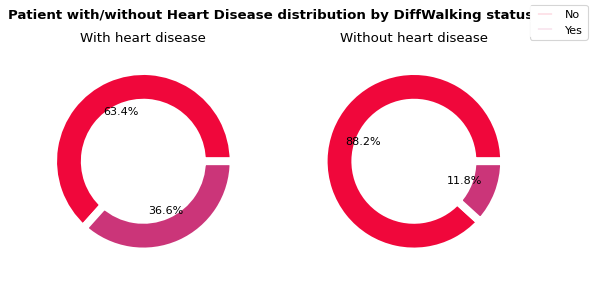

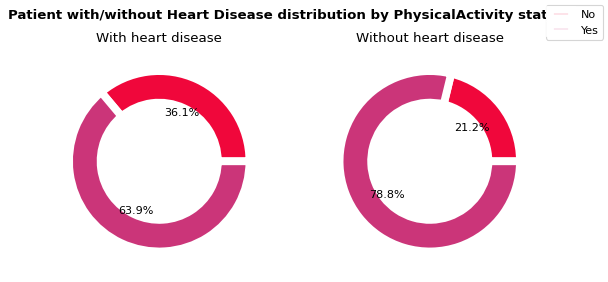

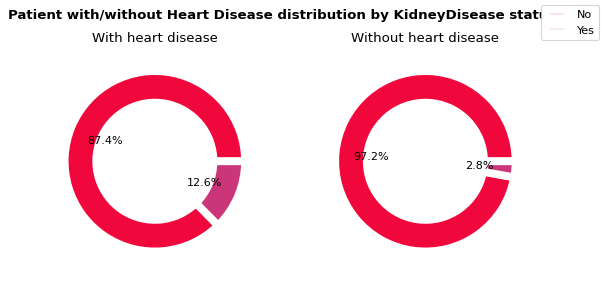

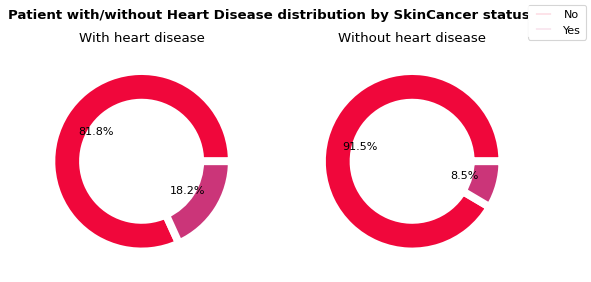

In [7]:
#Binary encoding variables: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Diabetic, Physical Activity, Asthma, KidneyDisease, SkinCancer
binary_cols = ['HeartDisease','Sex','Smoking','AlcoholDrinking','Stroke','Asthma', 'DiffWalking','PhysicalActivity','KidneyDisease','SkinCancer']


for i in range(1, len(binary_cols)):
    fig = plt.figure(figsize=(8,4), dpi=80)
    
    # Plot distribution of adults with heart disease
    ax1 = plt.subplot(1,2,1)
    df[df['HeartDisease'] == 'Yes'].groupby(df[binary_cols[i]]).HeartDisease.count().plot(kind='pie', colors= [c1, c5], autopct='%.1f%%', labeldistance=None,
                                                                                        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("With heart disease")
    
    # Plot distribution of adults without heart disease
    ax2 = plt.subplot(1,2,2)
    df[df['HeartDisease'] == 'No'].groupby(df[binary_cols[i]]).HeartDisease.count().plot(kind='pie',  colors= [c1, c5], autopct='%.1f%%', labeldistance=None,
                                                                                     wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("Without heart disease")
    plt.suptitle("Patient with/without Heart Disease distribution by " + binary_cols[i] + " status", fontweight='bold')
    
    handles, labels = ax1.get_legend_handles_labels()

        
    leg = fig.legend(handles, labels, loc = 'upper right', fancybox=True)
    
        
    plt.subplots_adjust(right=0.9)
    plt.show()
    
    

    

Main points: 
* Overall, there are more male adults that have heart disease than female peers.

* Within sample population with heart disease there are more smokers than non-smokers. 

* There is no noticeable differences between adults with and without heart disease in being a heavy drinker or having asthma. 

* Nevertheless people have heart disease seem to experience stoke and difficulty while walking more than those who don’t. 

* Finally people who diagnosed with and without heart disease are slightly distinct in physical activity, diagnosed with kidney disease or skin cancer.


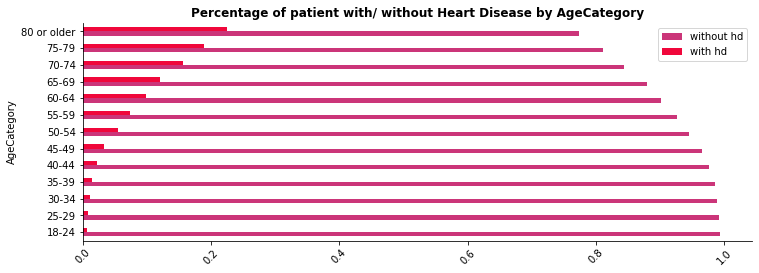

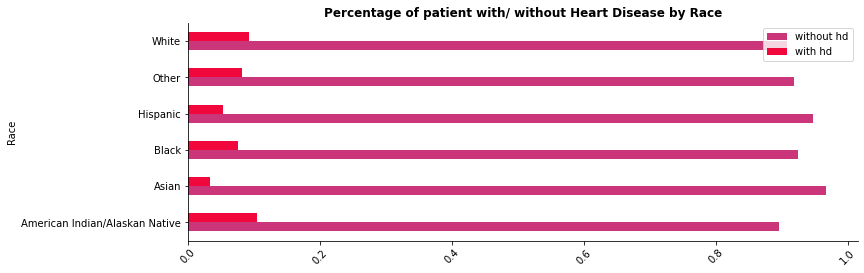

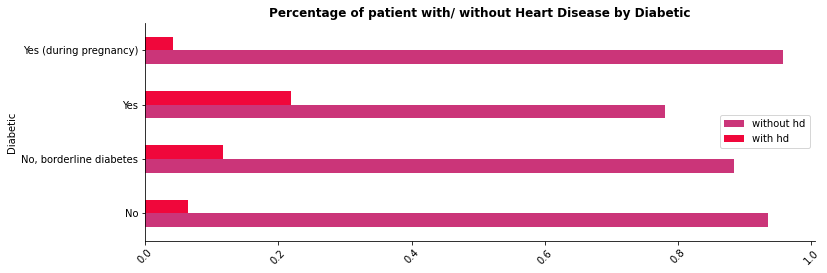

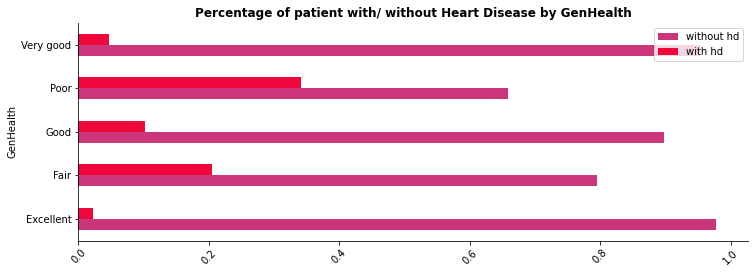

In [8]:
cat_cols = ['AgeCategory','Race','Diabetic','GenHealth']


for i in range(0, len(cat_cols)):
    crosstb = pd.crosstab(df[cat_cols[i]], df.HeartDisease)
    crosstb['without_hd_percent'] = crosstb['No'] / (crosstb['No'] + crosstb['Yes'])
    crosstb['with_hd_percent'] = crosstb['Yes'] / (crosstb['No'] + crosstb['Yes'])
    
    crosstb = crosstb.drop(['Yes', 'No'], axis = 1)
    
    crosstb.plot(kind='barh', color=[c5, c1])
    sns.despine()
    labels = ["without hd","with hd"]
    plt.gcf().set_size_inches(12, 4)
    plt.xticks(rotation = 45)
    plt.legend(labels=labels)
    plt.title("Percentage of patient with/ without Heart Disease by " + cat_cols[i], fontweight='bold')
    plt.show()

Takeaways:
* There might be a strong correlation between increasing age and the presence of heart disease.

* Asian and Hispanic responders seem to have lower heart disease than other peers but further analysis is necessary to confirm this statement.

* Adults with diabetes seem to have high rate of having heart diseases.

* Adults who considered Fair or Poor general health have higher chance of diagnosed with heart diseases.

# 4. Machine Learning Modeling

## 4.1 Transforming Data

Firstly, I will encode the data based on the feature types mentioned earlier. 


In [9]:
# Enconding categorical variables
t_df = df

#Binary encoding variables: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Diabetic, Physical Activity, Asthma, KidneyDisease, SkinCancer
binary_cols = ['HeartDisease','Sex','Smoking','AlcoholDrinking','Stroke','Asthma', 'DiffWalking','PhysicalActivity','KidneyDisease','SkinCancer']

for col in binary_cols:
    t_df[col] = t_df[col].replace(list(t_df[col].unique()),[0,1])


#One hot encoding for variables: Race

race_encoder=ce.OneHotEncoder(cols='Race',handle_unknown='return_nan',return_df=True,use_cat_names=True)

diabetic_encoder = ce.OneHotEncoder(cols='Diabetic', handle_unknown='return_nan', return_df=True, use_cat_names=True)

#Ordinal encoding for variables: AgeCategory, GenHealth

age_encoder= ce.OrdinalEncoder(cols=['AgeCategory'],return_df=True,
                           mapping=[{'col':'AgeCategory',
'mapping':{'18-24':0, '25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}}])


health_encoder = ce.OrdinalEncoder(cols=['GenHealth'], return_df=True,
                                    mapping=[{'col':'GenHealth',
                                            'mapping':{'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}}])


t_df = age_encoder.fit_transform(t_df)
t_df = health_encoder.fit_transform(t_df)
t_df = race_encoder.fit_transform(t_df)
t_df = diabetic_encoder.fit_transform(t_df)

t_df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,7,...,1.0,0.0,0.0,0.0,0,3,5.0,0,0,0
1,0,20.34,1,0,1,0.0,0.0,0,0,12,...,0.0,1.0,0.0,0.0,0,3,7.0,1,0,1
2,0,26.58,0,0,0,20.0,30.0,0,1,9,...,1.0,0.0,0.0,0.0,0,1,8.0,0,0,1
3,0,24.21,1,0,0,0.0,0.0,0,0,11,...,0.0,1.0,0.0,0.0,1,2,6.0,1,0,0
4,0,23.71,1,0,0,28.0,0.0,1,0,4,...,0.0,1.0,0.0,0.0,0,3,8.0,1,0,1


After that, I will use sklearn's package: precprocessing to normalize the numerical data using MinMaxScaler

In [10]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
names = t_df.columns
d = scaler.fit_transform(t_df)

scaled_df = pd.DataFrame(d, columns=names)


scaled_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes (during pregnancy),PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.055294,0.0,0.0,0.0,0.100000,1.0,0.0,0.0,0.583333,...,1.0,0.0,0.0,0.0,0.0,0.75,0.173913,0.0,0.0,0.0
1,0.0,0.100447,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.75,0.260870,1.0,0.0,1.0
2,0.0,0.175782,0.0,0.0,0.0,0.666667,1.0,0.0,1.0,0.750000,...,1.0,0.0,0.0,0.0,0.0,0.25,0.304348,0.0,0.0,1.0
3,0.0,0.147169,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,...,0.0,1.0,0.0,0.0,1.0,0.50,0.217391,1.0,0.0,0.0
4,0.0,0.141132,1.0,0.0,0.0,0.933333,0.0,1.0,0.0,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.75,0.304348,1.0,0.0,1.0


Finally, since the dataset is undersampled with many data for adults without heart disease, I will oversample the data to make it more balanced

In [11]:
class_0 = scaled_df[scaled_df['HeartDisease'] == 0]
class_1 = scaled_df[scaled_df['HeartDisease'] == 1]

class_1 = class_1.sample(len(class_0),replace=True)
train_df = pd.concat([class_0, class_1], axis=0)
print('Data in Train:')
print(train_df['HeartDisease'].value_counts())

Data in Train:
0.0    292422
1.0    292422
Name: HeartDisease, dtype: int64


## 4.2 Finding the Correlation

Find variables that have strong correlation with prevelance heart disease to optimize the model

In [12]:
from sklearn.metrics import matthews_corrcoef

cols = train_df.columns
corr = []

for col in cols:
    if col in binary_cols:
        corr.append(matthews_corrcoef(train_df['HeartDisease'], train_df[col]))
    else:
        corr.append(train_df['HeartDisease'].corr(train_df[col]))


correlation = pd.DataFrame(list(zip(cols, corr)), columns=['Variables','Corr_with_HeartDisease'])

correlation.drop(index=correlation.index[:1], axis=0, inplace=True)


correlation
    


,Variables,Corr_with_HeartDisease
1,BMI,0.091039
2,Smoking,-0.189459
3,AlcoholDrinking,-0.063085
4,Stroke,0.230710
5,PhysicalHealth,0.243814
6,MentalHealth,0.048523
7,DiffWalking,0.289790
8,Sex,0.126095
9,AgeCategory,0.440875
10,Race_White,0.074804


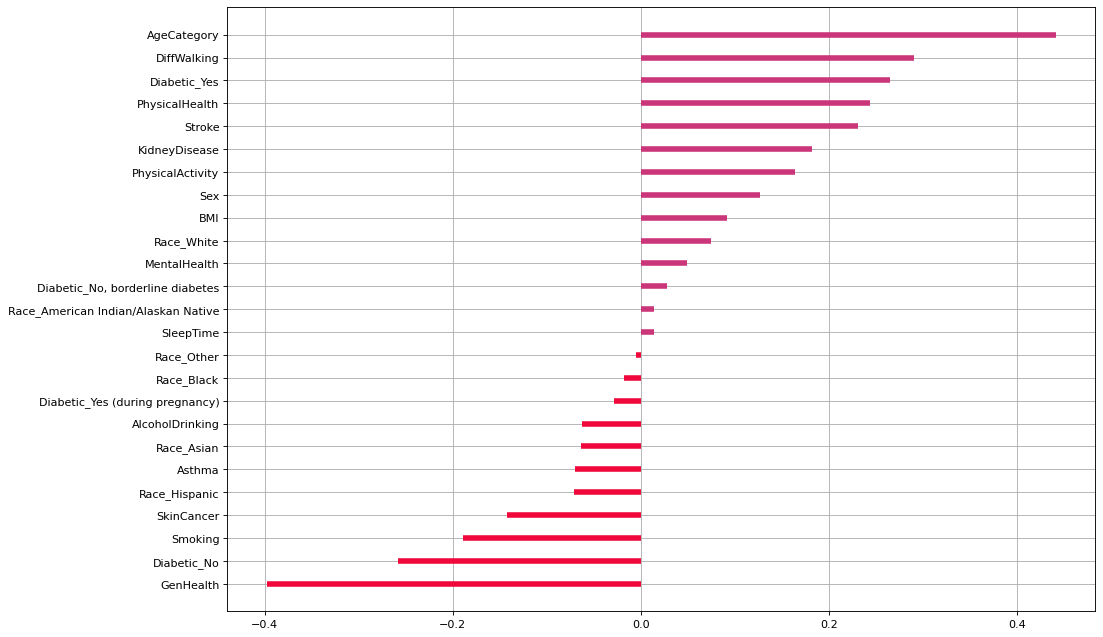

In [13]:
for i in range(len(correlation)):
    # Colour of bar chart is set to red if corr is < 0 and green otherwise
    correlation['colors'] = ['#F0073B' if float(x) <= 0 else '#CB3579' for x in correlation['Corr_with_HeartDisease']]

correlation = correlation.sort_values(ascending=True, by=['Corr_with_HeartDisease']) 

plt.figure(figsize=(14,10), dpi=80)

plt.hlines(y=correlation.Variables, xmin=0, xmax=correlation.Corr_with_HeartDisease, color=correlation.colors,  linewidth=5)

plt.grid()
plt.show()


From the correlation chart above I decide to choose the set of following variables for my model: GenHealth, Diabetic_No, Smoking, Stroke, PhysicalHealth, AgeCategory, DiffWalking, Diabetic_Yes and KidneyDisease

## 4.3 Modeling

To find the best way to predict heart disease with given and chosen indicators, I will try different classifier methods including: **Random Forest, K Neightborhood Nearest and Logistic Regression**. 

Besides that I will use *confusion matrix, precision, recall as well as f1 score* to evaluate the effectiveness of the machine learning models.

Sklearn modules, function used
* ensemble: RandomForestClassfier
* neighbors: KneighborsClassifier
* linear_model: LogisticRegression
* metrics: precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import RocCurveDisplay

The dataset will be split into 2 sets: training (80%) and testing (20%)

In [15]:
# Create training and testing data for machine learning application
x = train_df[['AgeCategory','DiffWalking','Stroke','Diabetic_Yes','Diabetic_No','KidneyDisease','PhysicalHealth','GenHealth','Smoking']]
y = train_df['HeartDisease']
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=42)

#### K Neighbors Classifier

In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
dic = {}

In [18]:
# Create KNeighborsClassifier
k_classifier = KNeighborsClassifier()
k_classifier.fit(x_train, y_train)
k_y_predict = k_classifier.predict(x_test)

print(f'model: {str(k_classifier)}')
print(f'Accuracy_score: {accuracy_score(y_test,k_y_predict)}')
print(f'Precission_score: {precision_score(y_test,k_y_predict)}')
print(f'Recall_score: {recall_score(y_test,k_y_predict)}')
print(f'F1-score: {f1_score(y_test,k_y_predict)}')
#print(classification_report(y_test, k_y_predict))
print("auc",roc_auc_score(y_test, k_y_predict))



model: KNeighborsClassifier()
Accuracy_score: 0.7365284819054622
Precission_score: 0.7286816571182568
Recall_score: 0.7530458590006844
F1-score: 0.7406634464883788
auc 0.7365410401805179


In [19]:
dic['KNeighborsClassifier']={}
dic['KNeighborsClassifier']['Accuracy_score'] = accuracy_score(y_test,k_y_predict)
dic['KNeighborsClassifier']['Precission_score'] = precision_score(y_test,k_y_predict)
dic['KNeighborsClassifier']['Recall_score'] = recall_score(y_test,k_y_predict)
dic['KNeighborsClassifier']['F1-score'] = f1_score(y_test,k_y_predict)
dic['KNeighborsClassifier']['auc']=roc_auc_score(y_test, k_y_predict)

In [20]:
dic

{'KNeighborsClassifier': {'Accuracy_score': 0.7365284819054622,
  'Precission_score': 0.7286816571182568,
  'Recall_score': 0.7530458590006844,
  'F1-score': 0.7406634464883788,
  'auc': 0.7365410401805179}}

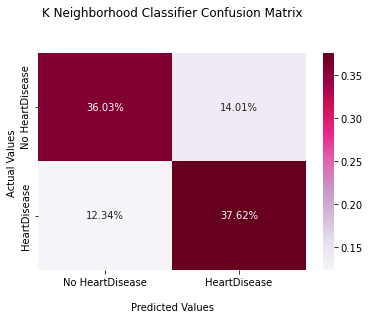

In [21]:
cm  = confusion_matrix(y_test, k_y_predict)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('K Neighborhood Classifier Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Random Forest Classifier

In [22]:
# Create Random Forest
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train, y_train)
rfc_y_predict = rfc.predict(x_test)


In [23]:
print(f'model: {str(rfc)}')
print(f'Accuracy_score: {accuracy_score(y_test,rfc_y_predict)}')
print(f'Precission_score: {precision_score(y_test,rfc_y_predict)}')
print(f'Recall_score: {recall_score(y_test,rfc_y_predict)}')
print(f'F1-score: {f1_score(y_test,rfc_y_predict)}')
print('auc',roc_auc_score(y_test,rfc_y_predict))
dic['RandomForestClassifier']={}
dic['RandomForestClassifier']['Accuracy_score'] = accuracy_score(y_test,rfc_y_predict)
dic['RandomForestClassifier']['Precission_score'] = precision_score(y_test,rfc_y_predict)
dic['RandomForestClassifier']['Recall_score'] = recall_score(y_test,rfc_y_predict)
dic['RandomForestClassifier']['F1-score'] = f1_score(y_test,rfc_y_predict)
dic['RandomForestClassifier']['auc']=roc_auc_score(y_test, rfc_y_predict)

model: RandomForestClassifier()
Accuracy_score: 0.7751455513854099
Precission_score: 0.7541958650363035
Recall_score: 0.8158453114305271
F1-score: 0.7838102205380701
auc 0.7751764956920272


In [24]:
dic

{'KNeighborsClassifier': {'Accuracy_score': 0.7365284819054622,
  'Precission_score': 0.7286816571182568,
  'Recall_score': 0.7530458590006844,
  'F1-score': 0.7406634464883788,
  'auc': 0.7365410401805179},
 'RandomForestClassifier': {'Accuracy_score': 0.7751455513854099,
  'Precission_score': 0.7541958650363035,
  'Recall_score': 0.8158453114305271,
  'F1-score': 0.7838102205380701,
  'auc': 0.7751764956920272}}

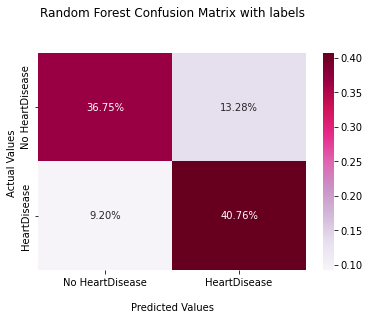

In [25]:
cm  = confusion_matrix(y_test, rfc_y_predict)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Random Forest Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Logistic Regression

In [26]:
# Create LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
lr_y_predict = lr.predict(x_test)

print(f'model: {str(lr)}')
print(f'Accuracy_score: {accuracy_score(y_test,lr_y_predict)}')
print(f'Precission_score: {precision_score(y_test,lr_y_predict)}')
print(f'Recall_score: {recall_score(y_test,lr_y_predict)}')
print(f'F1-score: {f1_score(y_test,lr_y_predict)}')
print('auc',roc_auc_score(y_test,lr_y_predict))

dic['LogisticRegression']={}
dic['LogisticRegression']['Accuracy_score'] = accuracy_score(y_test,lr_y_predict)
dic['LogisticRegression']['Precission_score'] = precision_score(y_test,lr_y_predict)
dic['LogisticRegression']['Recall_score'] = recall_score(y_test,lr_y_predict)
dic['LogisticRegression']['F1-score'] = f1_score(y_test,lr_y_predict)
dic['LogisticRegression']['auc']=roc_auc_score(y_test, lr_y_predict)

model: LogisticRegression(random_state=0)
Accuracy_score: 0.7531995656968941
Precission_score: 0.7408378668925302
Recall_score: 0.7782854209445585
F1-score: 0.759100088455697
auc 0.7532186386446383


In [27]:
dic

{'KNeighborsClassifier': {'Accuracy_score': 0.7365284819054622,
  'Precission_score': 0.7286816571182568,
  'Recall_score': 0.7530458590006844,
  'F1-score': 0.7406634464883788,
  'auc': 0.7365410401805179},
 'RandomForestClassifier': {'Accuracy_score': 0.7751455513854099,
  'Precission_score': 0.7541958650363035,
  'Recall_score': 0.8158453114305271,
  'F1-score': 0.7838102205380701,
  'auc': 0.7751764956920272},
 'LogisticRegression': {'Accuracy_score': 0.7531995656968941,
  'Precission_score': 0.7408378668925302,
  'Recall_score': 0.7782854209445585,
  'F1-score': 0.759100088455697,
  'auc': 0.7532186386446383}}

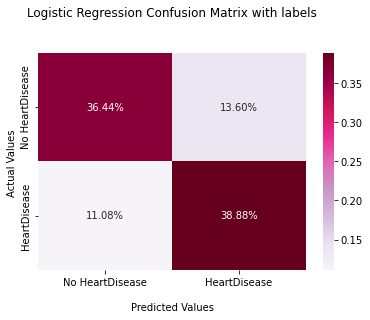

In [28]:
cm  = confusion_matrix(y_test, lr_y_predict)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Logistic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Evaluating using ROC and AUC

In [29]:
# descision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier


In [31]:
# Create LogisticRegression
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
dt_y_predict = dt.predict(x_test)

print(f'model: {str(dt)}')
print(f'Accuracy_score: {accuracy_score(y_test,dt_y_predict)}')
print(f'Precission_score: {precision_score(y_test,dt_y_predict)}')
print(f'Recall_score: {recall_score(y_test,dt_y_predict)}')
print(f'F1-score: {f1_score(y_test,dt_y_predict)}')
print('auc',roc_auc_score(y_test,dt_y_predict))

dic['DecisionTreeClassifier']={}
dic['DecisionTreeClassifier']['Accuracy_score'] = accuracy_score(y_test,dt_y_predict)
dic['DecisionTreeClassifier']['Precission_score'] = precision_score(y_test,dt_y_predict)
dic['DecisionTreeClassifier']['Recall_score'] = recall_score(y_test,dt_y_predict)
dic['DecisionTreeClassifier']['F1-score'] = f1_score(y_test,dt_y_predict)
dic['DecisionTreeClassifier']['auc']=roc_auc_score(y_test, dt_y_predict)

model: DecisionTreeClassifier(random_state=0)
Accuracy_score: 0.7747351862459284
Precission_score: 0.7553267667043266
Recall_score: 0.8122347707049966
F1-score: 0.782747788230832
auc 0.7747636974371059


In [45]:
dic

{'KNeighborsClassifier': {'Accuracy_score': 0.7365284819054622,
  'Precission_score': 0.7286816571182568,
  'Recall_score': 0.7530458590006844,
  'F1-score': 0.7406634464883788,
  'auc': 0.7365410401805179},
 'RandomForestClassifier': {'Accuracy_score': 0.7751455513854099,
  'Precission_score': 0.7541958650363035,
  'Recall_score': 0.8158453114305271,
  'F1-score': 0.7838102205380701,
  'auc': 0.7751764956920272},
 'LogisticRegression': {'Accuracy_score': 0.7531995656968941,
  'Precission_score': 0.7408378668925302,
  'Recall_score': 0.7782854209445585,
  'F1-score': 0.759100088455697,
  'auc': 0.7532186386446383},
 'DecisionTreeClassifier': {'Accuracy_score': 0.7747351862459284,
  'Precission_score': 0.7553267667043266,
  'Recall_score': 0.8122347707049966,
  'F1-score': 0.782747788230832,
  'auc': 0.7747636974371059},
 'AdaBoostClassifier': {'Accuracy_score': 0.7518316818986227,
  'Precission_score': 0.7471679720326734,
  'Recall_score': 0.7606947296372347,
  'F1-score': 0.7538706778

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
# Create LogisticRegression
ada = AdaBoostClassifier(random_state=0)
ada.fit(x_train, y_train)
ada_y_predict = ada.predict(x_test)

print(f'model: {str(dt)}')
print(f'Accuracy_score: {accuracy_score(y_test,ada_y_predict)}')
print(f'Precission_score: {precision_score(y_test,ada_y_predict)}')
print(f'Recall_score: {recall_score(y_test,ada_y_predict)}')
print(f'F1-score: {f1_score(y_test,ada_y_predict)}')
print('auc',roc_auc_score(y_test,ada_y_predict))

dic['AdaBoostClassifier']={}
dic['AdaBoostClassifier']['Accuracy_score'] = accuracy_score(y_test,ada_y_predict)
dic['AdaBoostClassifier']['Precission_score'] = precision_score(y_test,ada_y_predict)
dic['AdaBoostClassifier']['Recall_score'] = recall_score(y_test,ada_y_predict)
dic['AdaBoostClassifier']['F1-score'] = f1_score(y_test,ada_y_predict)
dic['AdaBoostClassifier']['auc']=roc_auc_score(y_test, ada_y_predict)

model: DecisionTreeClassifier(random_state=0)
Accuracy_score: 0.7518316818986227
Precission_score: 0.7471679720326734
Recall_score: 0.7606947296372347
F1-score: 0.7538706778137665
auc 0.7518384205345872


In [35]:
dic

{'KNeighborsClassifier': {'Accuracy_score': 0.7365284819054622,
  'Precission_score': 0.7286816571182568,
  'Recall_score': 0.7530458590006844,
  'F1-score': 0.7406634464883788,
  'auc': 0.7365410401805179},
 'RandomForestClassifier': {'Accuracy_score': 0.7751455513854099,
  'Precission_score': 0.7541958650363035,
  'Recall_score': 0.8158453114305271,
  'F1-score': 0.7838102205380701,
  'auc': 0.7751764956920272},
 'LogisticRegression': {'Accuracy_score': 0.7531995656968941,
  'Precission_score': 0.7408378668925302,
  'Recall_score': 0.7782854209445585,
  'F1-score': 0.759100088455697,
  'auc': 0.7532186386446383},
 'DecisionTreeClassifier': {'Accuracy_score': 0.7747351862459284,
  'Precission_score': 0.7553267667043266,
  'Recall_score': 0.8122347707049966,
  'F1-score': 0.782747788230832,
  'auc': 0.7747636974371059},
 'AdaBoostClassifier': {'Accuracy_score': 0.7518316818986227,
  'Precission_score': 0.7471679720326734,
  'Recall_score': 0.7606947296372347,
  'F1-score': 0.7538706778

In [36]:
from sklearn.svm import SVR

In [50]:
dic

{'KNeighborsClassifier': {'Accuracy_score': 0.7365284819054622,
  'Precission_score': 0.7286816571182568,
  'Recall_score': 0.7530458590006844,
  'F1-score': 0.7406634464883788,
  'auc': 0.7365410401805179},
 'RandomForestClassifier': {'Accuracy_score': 0.7751455513854099,
  'Precission_score': 0.7541958650363035,
  'Recall_score': 0.8158453114305271,
  'F1-score': 0.7838102205380701,
  'auc': 0.7751764956920272},
 'LogisticRegression': {'Accuracy_score': 0.7531995656968941,
  'Precission_score': 0.7408378668925302,
  'Recall_score': 0.7782854209445585,
  'F1-score': 0.759100088455697,
  'auc': 0.7532186386446383},
 'DecisionTreeClassifier': {'Accuracy_score': 0.7747351862459284,
  'Precission_score': 0.7553267667043266,
  'Recall_score': 0.8122347707049966,
  'F1-score': 0.782747788230832,
  'auc': 0.7747636974371059},
 'AdaBoostClassifier': {'Accuracy_score': 0.7518316818986227,
  'Precission_score': 0.7471679720326734,
  'Recall_score': 0.7606947296372347,
  'F1-score': 0.7538706778

In [51]:
del dic['SVR']

In [52]:
# Create LogisticRegression
svc = SVC(max_iter=1000,probability=True)
svc.fit(x_train, y_train)
svc_y_predict = svc.predict(x_test)

print(f'model: {str(dt)}')
print(f'Accuracy_score: {accuracy_score(y_test,svc_y_predict)}')
print(f'Precission_score: {precision_score(y_test,svc_y_predict)}')
print(f'Recall_score: {recall_score(y_test,svc_y_predict)}')
print(f'F1-score: {f1_score(y_test,svc_y_predict)}')
print('auc',roc_auc_score(y_test,svc_y_predict))

dic['SVC']={}
dic['SVC']['Accuracy_score'] = accuracy_score(y_test,svc_y_predict)
dic['SVC']['Precission_score'] = precision_score(y_test,svc_y_predict)
dic['SVC']['Recall_score'] = recall_score(y_test,svc_y_predict)
dic['SVC']['F1-score'] = f1_score(y_test,svc_y_predict)
dic['SVC']['auc']=roc_auc_score(y_test, svc_y_predict)

/Users/andrew/django-vue-admin/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


model: DecisionTreeClassifier(random_state=0)
Accuracy_score: 0.3372773982850157
Precission_score: 0.2905725827698252
Recall_score: 0.22647159479808351
F1-score: 0.2545486017617417
auc 0.33719315187289234


In [38]:
from sklearn.naive_bayes import GaussianNB

In [40]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_y_predict = nb.predict(x_test)

print(f'model: {str(dt)}')
print(f'Accuracy_score: {accuracy_score(y_test,nb_y_predict)}')
print(f'Precission_score: {precision_score(y_test,nb_y_predict)}')
print(f'Recall_score: {recall_score(y_test,nb_y_predict)}')
print(f'F1-score: {f1_score(y_test,nb_y_predict)}')
print('auc',roc_auc_score(y_test,nb_y_predict))

dic['naive_bayes']={}
dic['naive_bayes']['Accuracy_score'] = accuracy_score(y_test,nb_y_predict)
dic['naive_bayes']['Precission_score'] = precision_score(y_test,nb_y_predict)
dic['naive_bayes']['Recall_score'] = recall_score(y_test,nb_y_predict)
dic['naive_bayes']['F1-score'] = f1_score(y_test,nb_y_predict)
dic['naive_bayes']['auc']=roc_auc_score(y_test, nb_y_predict)

model: DecisionTreeClassifier(random_state=0)
Accuracy_score: 0.7007497713069275
Precission_score: 0.7502295488031432
Recall_score: 0.6011978097193703
F1-score: 0.6674962715277711
auc 0.7006740812679614


In [42]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_y_predict = xgb.predict(x_test)

print(f'model: {str(xgb)}')
print(f'Accuracy_score: {accuracy_score(y_test,xgb_y_predict)}')
print(f'Precission_score: {precision_score(y_test,xgb_y_predict)}')
print(f'Recall_score: {recall_score(y_test,xgb_y_predict)}')
print(f'F1-score: {f1_score(y_test,xgb_y_predict)}')
print('auc',roc_auc_score(y_test,xgb_y_predict))

dic['XGBClassifier']={}
dic['XGBClassifier']['Accuracy_score'] = accuracy_score(y_test,nb_y_predict)
dic['XGBClassifier']['Precission_score'] = precision_score(y_test,nb_y_predict)
dic['XGBClassifier']['Recall_score'] = recall_score(y_test,nb_y_predict)
dic['XGBClassifier']['F1-score'] = f1_score(y_test,nb_y_predict)
dic['XGBClassifier']['auc']=roc_auc_score(y_test, nb_y_predict)

In [ ]:
ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(k_classifier, x_test, y_test, ax=ax)
rdf_disp = RocCurveDisplay.from_estimator(rdf, x_test, y_test, ax=ax)
lg_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=ax)
nb_disp = RocCurveDisplay.from_estimator(nb, x_test, y_test, ax=ax)
svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test, ax=ax)
xgb_disp = RocCurveDisplay.from_estimator(xgb, x_test, y_test, ax=ax)
dt_disp = RocCurveDisplay.from_estimator(dt, x_test, y_test, ax=ax)
ada_disp = RocCurveDisplay.from_estimator(ada, x_test, y_test, ax=ax)
plt.show()

In [ ]:
ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(k_classifier, x_test, y_test, ax=ax)
rdf_disp = RocCurveDisplay.from_estimator(rdf, x_test, y_test, ax=ax)
lg_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=ax)
nb_disp = RocCurveDisplay.from_estimator(nb, x_test, y_test, ax=ax)
# svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test, ax=ax)
xgb_disp = RocCurveDisplay.from_estimator(xgb, x_test, y_test, ax=ax)
dt_disp = RocCurveDisplay.from_estimator(dt, x_test, y_test, ax=ax)
ada_disp = RocCurveDisplay.from_estimator(ada, x_test, y_test, ax=ax)
plt.show()

In [ ]:
### Interpret

From ML models built, Random Forest method yields the best result with a relatively high recall and precision rate: 0.82 and 0.74 with an f-1 score of 0.78.



In [43]:
### Interpret

From ML models built, Random Forest method yields the best result with a relatively high recall and precision rate: 0.82 and 0.74 with an f-1 score of 0.78.



model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy_score: 0.7602185194367739
Precission_score: 0.7379174298999577
Recall_score: 0.8065195071868583
F1-score: 0.7706948566382967
auc 0.7602537223952197


NameError: name 'rdf' is not defined

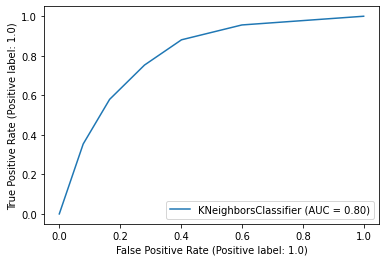

In [44]:
ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(k_classifier, x_test, y_test, ax=ax)
rdf_disp = RocCurveDisplay.from_estimator(rdf, x_test, y_test, ax=ax)
lg_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=ax)
nb_disp = RocCurveDisplay.from_estimator(nb, x_test, y_test, ax=ax)
svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test, ax=ax)
xgb_disp = RocCurveDisplay.from_estimator(xgb, x_test, y_test, ax=ax)
dt_disp = RocCurveDisplay.from_estimator(dt, x_test, y_test, ax=ax)
ada_disp = RocCurveDisplay.from_estimator(ada, x_test, y_test, ax=ax)
plt.show()

In [ ]:
ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(k_classifier, x_test, y_test, ax=ax)
rdf_disp = RocCurveDisplay.from_estimator(rdf, x_test, y_test, ax=ax)
lg_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=ax)
nb_disp = RocCurveDisplay.from_estimator(nb, x_test, y_test, ax=ax)
# svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test, ax=ax)
xgb_disp = RocCurveDisplay.from_estimator(xgb, x_test, y_test, ax=ax)
dt_disp = RocCurveDisplay.from_estimator(dt, x_test, y_test, ax=ax)
ada_disp = RocCurveDisplay.from_estimator(ada, x_test, y_test, ax=ax)
plt.show()

In [ ]:
### Interpret

From ML models built, Random Forest method yields the best result with a relatively high recall and precision rate: 0.82 and 0.74 with an f-1 score of 0.78.



### Interpret

From ML models built, Random Forest method yields the best result with a relatively high recall and precision rate: 0.82 and 0.74 with an f-1 score of 0.78.



# Last words

Please help me by upvote this analysis and also comment on any place that I can improve this analysis!!! Thank you very much you alll!

### 

### 